In [3]:
import os
import cv2

data_dir =  r"C:\Users\Asus\Capstone\dataset"
labels = ["good", "poor", "satisfactory", "very_poor"]
x = []
y = []
for label in labels:
    data = os.path.join(data_dir,label)
    for image in os.listdir(data):
        try:
            im = cv2.imread(os.path.join(data,image),cv2.IMREAD_COLOR)
            im = cv2.resize(im,(224,224))
            
            x.append(im)
            y.append(labels.index(label))
            
            
        except Exception as e:
            pass

In [4]:
len(x)        
len(y)

2074

In [5]:
import numpy as np
np.unique(y)
np.unique(x)

x = np.array(x)/255.0
y = np.array(y)

x.shape
y.shape

x = x.reshape(-1, 224, 224, 3)
x.shape
y = y.reshape(-1, 1)

In [6]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y,4,)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(
fill_mode= 'nearest',
horizontal_flip=False,
vertical_flip=False,
shear_range=0.1,
zoom_range = 0.1,  
width_shift_range=0.2,  
height_shift_range=0.2
)
datagenerator.fit(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(224,224,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dropout(0.3),
    
tf.keras.layers.Dense(4,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

model.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=[earlystop],validation_data=datagenerator.flow(x_test,y_test))

Train for 49 steps, validate for 17 steps
Epoch 1/20
49/49 [==============================] - 61s 1s/step - loss: 0.9131 - accuracy: 0.6045 - val_loss: 0.4654 - val_accuracy: 0.8150
Epoch 2/20
49/49 [==============================] - 45s 922ms/step - loss: 0.4988 - accuracy: 0.8116 - val_loss: 0.3804 - val_accuracy: 0.8536
Epoch 3/20
49/49 [==============================] - 51s 1s/step - loss: 0.3431 - accuracy: 0.8695 - val_loss: 0.3158 - val_accuracy: 0.8882
Epoch 4/20
49/49 [==============================] - 45s 909ms/step - loss: 0.3244 - accuracy: 0.8830 - val_loss: 0.2926 - val_accuracy: 0.8786
Epoch 5/20
49/49 [==============================] - 46s 939ms/step - loss: 0.2927 - accuracy: 0.8894 - val_loss: 0.2949 - val_accuracy: 0.8882
Epoch 6/20
49/49 [==============================] - 46s 935ms/step - loss: 0.2545 - accuracy: 0.9132 - val_loss: 0.2315 - val_accuracy: 0.9171
Epoch 7/20
49/49 [==============================] - 48s 982ms/step - loss: 0.3166 - accuracy: 0.8932 - val

In [32]:
model.save("road_classifier2.h5", save_format="h5")

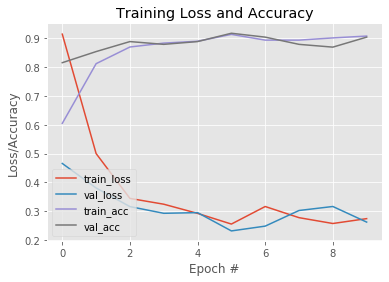

In [27]:
import matplotlib.pyplot as plt
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [28]:
model.evaluate(x_test, y_test)

519/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24029084000743653, 0.911368]